In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
 
import numpy as np
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [16]:
import tensorflow as tf
print(tf. __version__) 

2.10.1


In [17]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available: ",len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


# Data preparation

image have amikacin and cefazolin 150 images in each type

("C:\Users\captain\0-Handwritten CNN\binarized_image\amikacin\amikacin_1.png)

#Organize data into train , valid , teset dirs
os.chdir('data/amikacin-cefazolin')
if os.path.isdir('train/amikacin') is False:
    os.makedirs('train/amikacin')
    os.makedirs('valid/amikacin')
    os.makedirs('test/amikacin')
    
    os.makedirs('train/cefazolin')
    os.makedirs('valid/cefazolin')
    os.makedirs('test/cefazolin')
    
    for c in random.sample(glob.glob("amikacin*"),80):
        shutil.move(c,'train/amikacin')
    for c in random.sample(glob.glob("cefazolin*"),80):
        shutil.move(c,'train/cefazolin')
    for c in random.sample(glob.glob("amikacin*"),10):
        shutil.move(c,'valid/amikacin')
    for c in random.sample(glob.glob("cefazolin*"),10):
        shutil.move(c,'valid/cefazolin')
    for c in random.sample(glob.glob("amikacin*"),10):
        shutil.move(c,'test/amikacin')
    for c in random.sample(glob.glob("cefazolin*"),10):
        shutil.move(c,'test/cefazolin')
        
os.chdir("../../")

In [18]:
#Organize data into train , valid , teset dirs

#1300 -> 90:30:30 -> 780:260:260
#150->90 30 30
train_count=90
valid_count=30
test_count=30
os.chdir(r'C:\Users\captain\0-Handwritten CNN\data\5class-pure')
if os.path.isdir('train/amikacin') is False:
    os.makedirs('train/amikacin')
    os.makedirs('valid/amikacin')
    os.makedirs('test/amikacin')
    
    os.makedirs('train/cefazolin')
    os.makedirs('valid/cefazolin')
    os.makedirs('test/cefazolin')
    
    os.makedirs('train/paracetamol')
    os.makedirs('valid/paracetamol')
    os.makedirs('test/paracetamol')
    
    os.makedirs('train/doxycycline')
    os.makedirs('valid/doxycycline')
    os.makedirs('test/doxycycline')
    
    os.makedirs('train/amoxicillin')
    os.makedirs('valid/amoxicillin')
    os.makedirs('test/amoxicillin')
    
    for c in random.sample(glob.glob("amikacin*"),train_count):
        shutil.move(c,'train/amikacin')
    for c in random.sample(glob.glob("cefazolin*"),train_count):
        shutil.move(c,'train/cefazolin')
    for c in random.sample(glob.glob("amikacin*"),valid_count):
        shutil.move(c,'valid/amikacin')
    for c in random.sample(glob.glob("cefazolin*"),valid_count):
        shutil.move(c,'valid/cefazolin')
    for c in random.sample(glob.glob("amikacin*"),test_count):
        shutil.move(c,'test/amikacin')
    for c in random.sample(glob.glob("cefazolin*"),test_count):
        shutil.move(c,'test/cefazolin')
        
    for c in random.sample(glob.glob("paracetamol*"),train_count):
        shutil.move(c,'train/paracetamol')
    for c in random.sample(glob.glob("paracetamol*"),valid_count):
        shutil.move(c,'valid/paracetamol')
    for c in random.sample(glob.glob("paracetamol*"),test_count):
        shutil.move(c,'test/paracetamol')
        
    for c in random.sample(glob.glob("doxycycline*"),train_count):
        shutil.move(c,'train/doxycycline')
    for c in random.sample(glob.glob("doxycycline*"),valid_count):
        shutil.move(c,'valid/doxycycline')
    for c in random.sample(glob.glob("doxycycline*"),test_count):
        shutil.move(c,'test/doxycycline')    
        
    for c in random.sample(glob.glob("amoxicillin*"),train_count):
        shutil.move(c,'train/amoxicillin')
    for c in random.sample(glob.glob("amoxicillin*"),valid_count):
        shutil.move(c,'valid/amoxicillin')
    for c in random.sample(glob.glob("amoxicillin*"),test_count):
        shutil.move(c,'test/amoxicillin')    
os.chdir("../../")

In [19]:
train_path = 'data/5class/train'
valid_path = 'data/5class/valid'
test_path = 'data/5class/test'
                                            
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
	.flow_from_directory(directory=train_path,target_size=(224,224),classes=['amikacin','amoxicillin','cefazolin','doxycycline','paracetamol'],batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
	.flow_from_directory(directory=valid_path,target_size=(224,224),classes=['amikacin','amoxicillin','cefazolin','doxycycline','paracetamol'],batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
	.flow_from_directory(directory=test_path,target_size=(224,224),classes=['amikacin','amoxicillin','cefazolin','doxycycline','paracetamol'],batch_size=10,shuffle=False)

Found 3900 images belonging to 5 classes.
Found 1300 images belonging to 5 classes.
Found 1300 images belonging to 5 classes.


In [20]:
#Verified data
assert train_batches.n == 3900
assert valid_batches.n == 1300
assert test_batches.n == 1300


In [21]:
imgs, labels = next(train_batches)

In [22]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are place
def plotImages (images_arr):
    fig, axes = plt.subplots(1,16, figsize= (15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [23]:
print(len(imgs))

10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

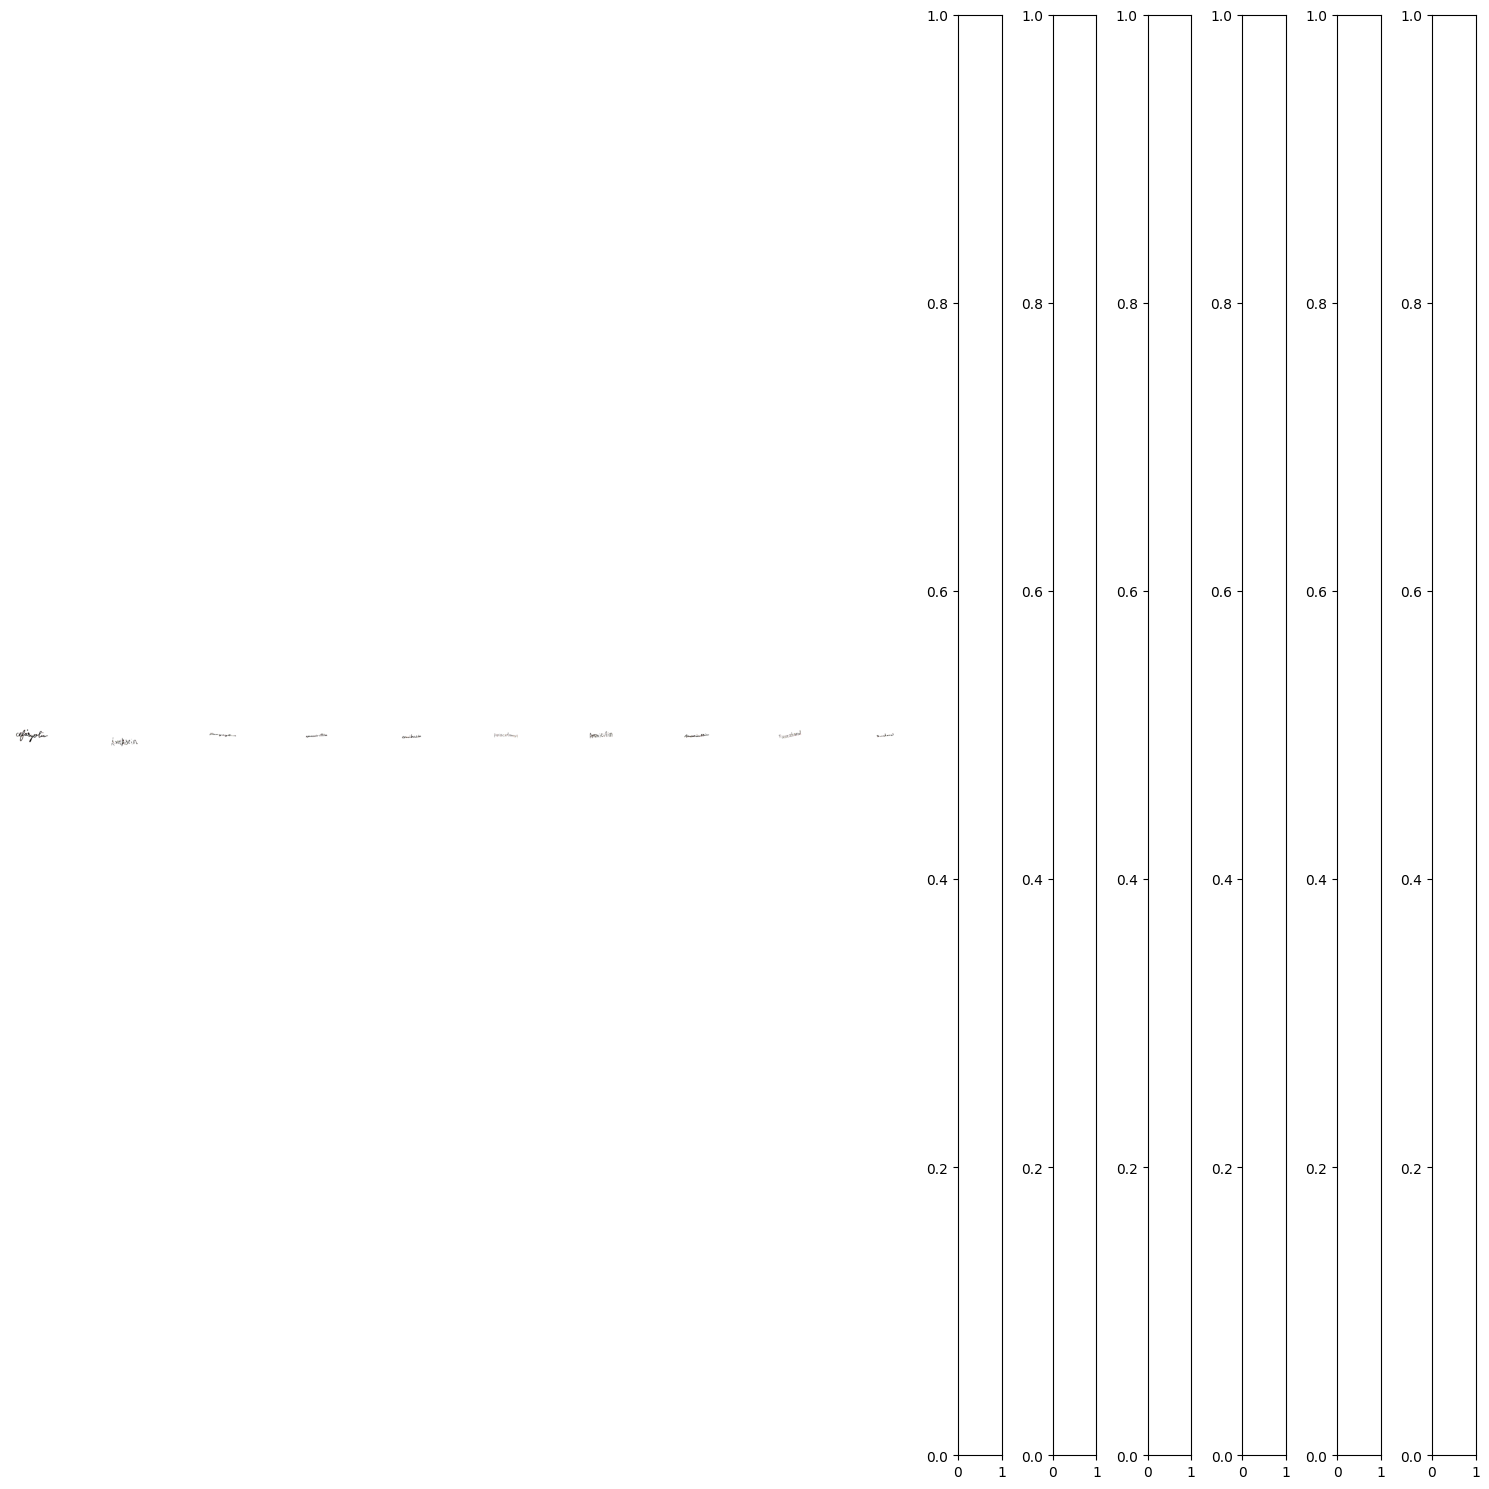

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [24]:
plotImages(imgs)
print(labels)

#in model.fit step per epoch = training sample/batches size
#e.g. 100/5 = 20 = step per epoch
#if pass validation data. we need to pass validation_steps


# Build and train CNN 

## Vggnet model section

In [25]:
from tensorflow.keras.layers import Input, MaxPooling2D
from tensorflow.keras.models import Model

In [26]:
with tf.device('/cpu:0'):
    _input = Input((224,224,3))

    conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
    conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
    pool1  = MaxPooling2D((2, 2))(conv2)

    conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
    conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
    pool2  = MaxPooling2D((2, 2))(conv4)

    conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
    conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
    conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
    pool3  = MaxPooling2D((2, 2))(conv7)

    conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
    conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
    conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
    pool4  = MaxPooling2D((2, 2))(conv10)

    conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
    conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
    conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
    pool5  = MaxPooling2D((2, 2))(conv13)

    flat   = Flatten()(pool5)
    dense1 = Dense(4096, activation="relu")(flat)
    dense2 = Dense(4096, activation="relu")(dense1)
    output = Dense(5, activation="softmax")(dense2)

    vgg16_model  = Model(inputs=_input, outputs=output)

In [27]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

In [28]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [29]:

checkpoint_filepath = 'C:\\Users\\captain\\0-Handwritten CNN\\models'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#model.fit(epochs=EPOCHS, callbacks=[model_checkpoint_callback])
#model.load_weights(checkpoint_filepath)

from keras import backend as K
K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=6,
                                                   inter_op_parallelism_threads=6)))

In [34]:
with tf.device('/cpu:0'):
	history = vgg16_model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=1,callbacks=[model_checkpoint_callback])

Epoch 1/10
390/390 [==============================] - ETA: 0s - loss: 0.7974 - accuracy: 0.6538

INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


390/390 [==============================] - 1567s 4s/step - loss: 0.7974 - accuracy: 0.6538 - val_loss: 0.1501 - val_accuracy: 0.9454
Epoch 2/10
390/390 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9408

INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


390/390 [==============================] - 1582s 4s/step - loss: 0.1713 - accuracy: 0.9408 - val_loss: 0.1044 - val_accuracy: 0.9638
Epoch 3/10
390/390 [==============================] - ETA: 0s - loss: 0.1226 - accuracy: 0.9626

INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


390/390 [==============================] - 1394s 4s/step - loss: 0.1226 - accuracy: 0.9626 - val_loss: 0.1038 - val_accuracy: 0.9708
Epoch 4/10
390/390 [==============================] - ETA: 0s - loss: 0.0516 - accuracy: 0.9838

INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


390/390 [==============================] - 1382s 4s/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.0517 - val_accuracy: 0.9838
Epoch 5/10
390/390 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 0.9854

INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


INFO:tensorflow:Assets written to: C:\Users\captain\0-Handwritten CNN\models\assets


390/390 [==============================] - 1389s 4s/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0261 - val_accuracy: 0.9923
Epoch 6/10
390/390 [==============================] - 1382s 4s/step - loss: 0.0528 - accuracy: 0.9831 - val_loss: 0.0840 - val_accuracy: 0.9708
Epoch 7/10
390/390 [==============================] - 1375s 4s/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.1169 - val_accuracy: 0.9700
Epoch 8/10
390/390 [==============================] - 1378s 4s/step - loss: 0.0398 - accuracy: 0.9892 - val_loss: 0.1357 - val_accuracy: 0.9562
Epoch 9/10
390/390 [==============================] - 1380s 4s/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.1009 - val_accuracy: 0.9777
Epoch 10/10
390/390 [==============================] - 1382s 4s/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 0.1517 - val_accuracy: 0.9700


In [35]:
# save the trained model
vgg16_model.save('vgg16_pure.h5')

In [36]:
import pickle
with open('history.obj', 'wb') as file:
    pickle.dump(history.history, file)

In [37]:
# Evaluate the model on the test set
test_loss, test_acc = vgg16_model.evaluate(train_batches)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

390/390 [==============================] - 78s 173ms/step - loss: 0.0812 - accuracy: 0.9795
Test loss: 0.08116287738084793
Test accuracy: 0.9794871807098389


In [38]:
# Evaluate the model on the test set
# Evaluate the model on the test set
test_loss, test_acc = vgg16_model.evaluate(test_batches)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')


130/130 [==============================] - 23s 173ms/step - loss: 0.1277 - accuracy: 0.9685
Test loss: 0.1276734173297882
Test accuracy: 0.9684615135192871


# Predict

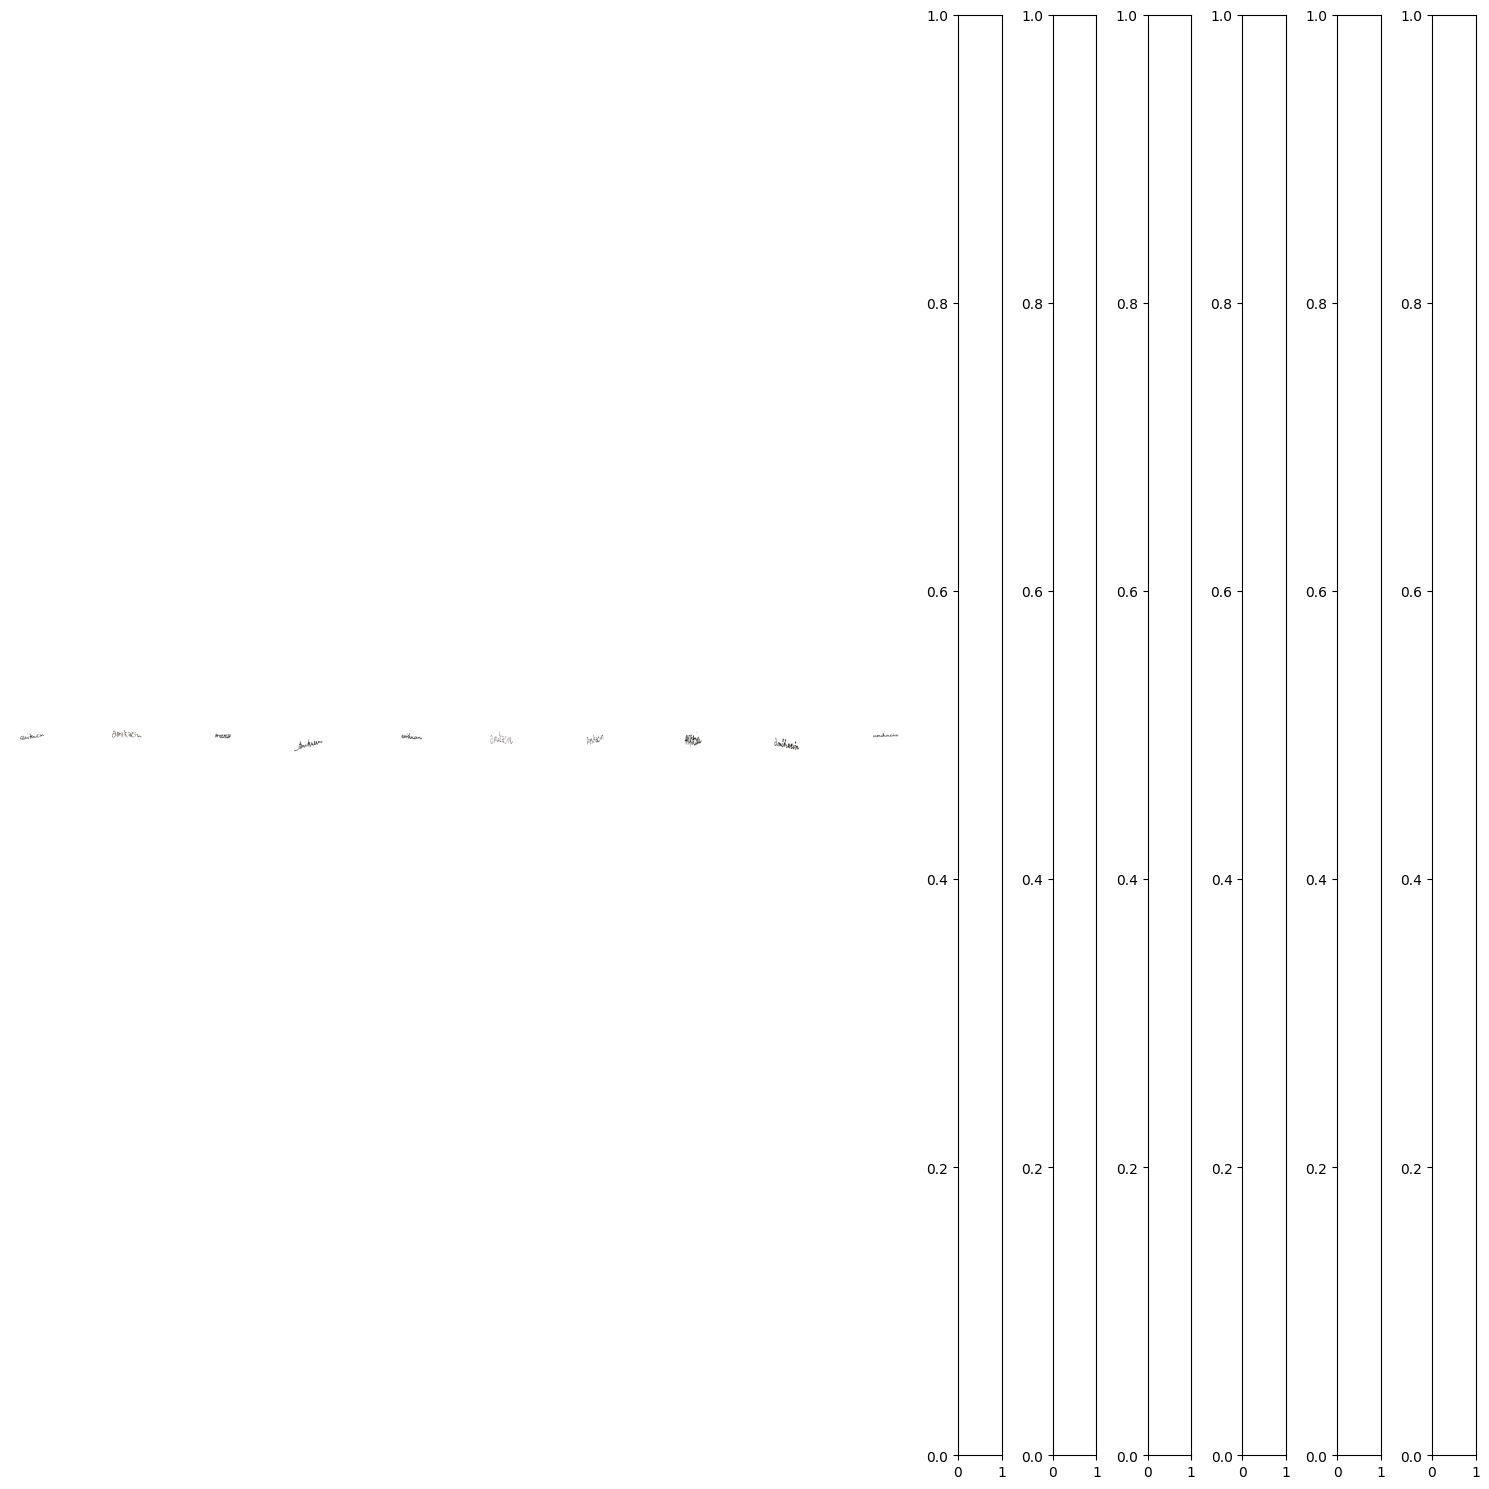

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [39]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [40]:
test_batches.classes

array([0, 0, 0, ..., 4, 4, 4])

In [41]:
predictions = vgg16_model.predict(x=test_batches,verbose=0)

In [42]:
np.round(predictions)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [43]:
#This is full probality of prediction confident
predictions

array([[9.9999964e-01, 1.1198376e-11, 3.1760325e-07, 3.4361573e-11,
        2.6130986e-11],
       [1.0000000e+00, 3.5789291e-13, 6.2868493e-13, 3.3538158e-14,
        4.9910081e-14],
       [9.9985445e-01, 4.8837586e-07, 1.3636587e-04, 4.7694557e-06,
        3.9898096e-06],
       ...,
       [1.8022663e-04, 6.1565237e-09, 4.6375143e-07, 7.2383838e-10,
        9.9981934e-01],
       [1.3464838e-08, 2.0194674e-10, 1.6928008e-11, 5.9701922e-12,
        1.0000000e+00],
       [5.1292144e-09, 1.0931758e-06, 3.8001893e-12, 1.9440613e-06,
        9.9999690e-01]], dtype=float32)

In [44]:
cm = confusion_matrix(y_true = test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [45]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting "normalize=True`.
    """
    plt.imshow(cm, interpolation= 'nearest',cmap="Blues")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

In [46]:
test_batches.class_indices

{'amikacin': 0,
 'amoxicillin': 1,
 'cefazolin': 2,
 'doxycycline': 3,
 'paracetamol': 4}

Confusion matrix, without normalization
[[260   0   0   0   0]
 [  0 260   0   0   0]
 [  1   0 259   0   0]
 [  2   0   2 256   0]
 [ 35   0   1   0 224]]


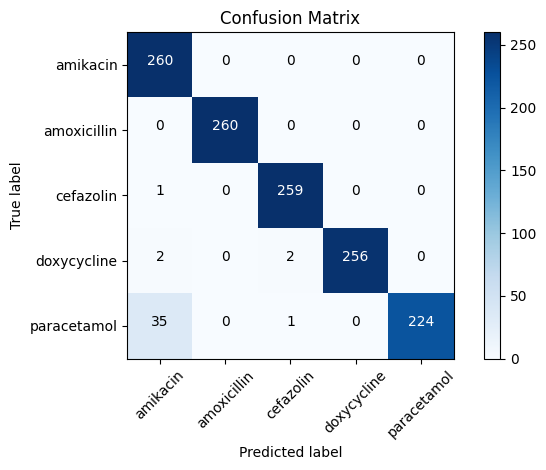

In [47]:
# labels instead classes argument
cm_plot_labels = ['amikacin','amoxicillin','cefazolin','doxycycline','paracetamol']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title="Confusion Matrix")

# Inference single image to predict

In [48]:
from PIL import Image
img = Image.open("binarized_image/cefazolin/cefazolin-0051.png") #for example image size : 28x28x3
img1 = img.convert('L')  #convert a gray scale
print(img1.size)
y = np.expand_dims(img1, axis=-1)
print(y.shape)


(300, 150)
(150, 300, 1)


In [59]:
from PIL import Image
# Load a single image for prediction
image_path = r"C:\Users\captain\0-Handwritten CNN\binarized_image\doxycycline\doxycycline-0001.png"
image = Image.open(image_path)
image = image.resize((224, 224))
image_array = np.array(image)
image_array = image_array.reshape((224, 224, 1))

# Make a prediction using the trained model
prediction = vgg16_model.predict(image_array)

# Convert the prediction from a probability distribution to a class label
predicted_class = np.argmax(prediction)

# Print the predicted class label
if predicted_class == 0:
    print("Amikacin")
else:
    print("Cefazolin")

InvalidArgumentError: Graph execution error:

2 root error(s) found.
  (0) INVALID_ARGUMENT:  transpose expects a vector of size 3. But input(1) is a vector of size 4
	 [[{{node model/conv2d/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_uint8_Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
	 [[model/dense_2/Softmax/_69]]
  (1) INVALID_ARGUMENT:  transpose expects a vector of size 3. But input(1) is a vector of size 4
	 [[{{node model/conv2d/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_uint8_Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_predict_function_43141]

In [60]:
# specify the folder path
folder_path = r"C:\Users\captain\0-Handwritten CNN\binarized_image\doxycycline"

# get a list of all the files in the folder with a .jpg extension
file_list = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# print the path to each file in the list
for file in file_list:
    file_path = os.path.join(folder_path, file)
    # print(file_path)
    # Load a single image for prediction
    image_path = file_path
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image_array = np.array(image)
    image_array = image_array.reshape((224, 224,3))

    # Make a prediction using the trained model
    prediction = vgg16_model.predict(image_array)

    # Convert the prediction from a probability distribution to a class label
    predicted_class = np.argmax(prediction)

    # Print the predicted class label
    if predicted_class == 0:
        print("Amikacin")
    else:
        print("Cefazolin")

ValueError: cannot reshape array of size 50176 into shape (224,224,3)

# model.save()

In [61]:
import os.path
if os.path.isfile('models/vggnet_5class_model.h5') is False:
    vgg16_model.save('models/vggnet_5class_model.h5')

This save functions saves:
- The architecture of the model,allowing to re-create the model
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

# load model

In [62]:
from tensorlflow.keras.models import load_model
new_model = load_model("models/vggnet_5class_model.h5")

ModuleNotFoundError: No module named 'tensorlflow'

In [63]:
new_model.summary()

NameError: name 'new_model' is not defined

In [ ]:
new_model.get_weights()

# model.to_JSON() and YAML()

In [64]:
#save as JSON
json_string = vgg16_model.to_json()
#save as YAML
# yaml_string = model.to_yaml()

In [65]:
json_string

'{"class_name": "Functional", "config": {"name": "model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "conv2d", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "dtype": "float32", "filters": 64, "kern

In [66]:
#model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

#model reconstruction from JYAML:
#from tensorflow.keras.models import model_from_yaml
#model_architecture = model_from_yaml(yaml_string)


In [67]:
model_architecture.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

# 3. model.save_weights()

save only weights of model

import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')